In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
heart_disease_data = pd.read_csv('./data/heart_disease_uci.csv').set_index('id')
heart_disease_data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


In [69]:
missing_values = heart_disease_data.isnull().sum()
missing_values_percentage = (missing_values / len(heart_disease_data)) * 100
missing_values_percentage[missing_values_percentage > 0]  


trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
dtype: float64

In [70]:
heart_disease_data = heart_disease_data.drop(columns=['dataset', 'slope', 'ca', 'thal'], errors='ignore')

heart_disease_data = heart_disease_data.dropna()

heart_disease_data.isnull().sum().sum()  


0

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


obj = heart_disease_data.select_dtypes(include=['object']).columns
bools = heart_disease_data.select_dtypes(include=['bool']).columns
for col in obj:
    heart_disease_data[col] = LabelEncoder().fit_transform(heart_disease_data[col])
    
for col in bools:
    heart_disease_data[col] = OneHotEncoder().fit_transform(heart_disease_data[col])
    
heart_disease_data['num'] = heart_disease_data['num'].apply(lambda x: 1 if x > 0 else 0)

X = heart_disease_data.drop(columns=['num'])
y = heart_disease_data['num']



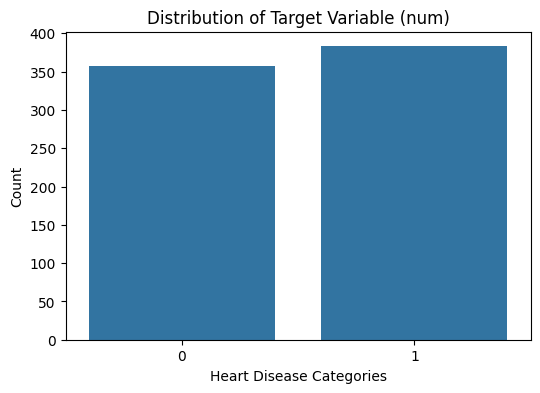

In [75]:
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=heart_disease_data)
plt.title('Distribution of Target Variable (num)')
plt.xlabel('Heart Disease Categories')
plt.ylabel('Count')
plt.show()

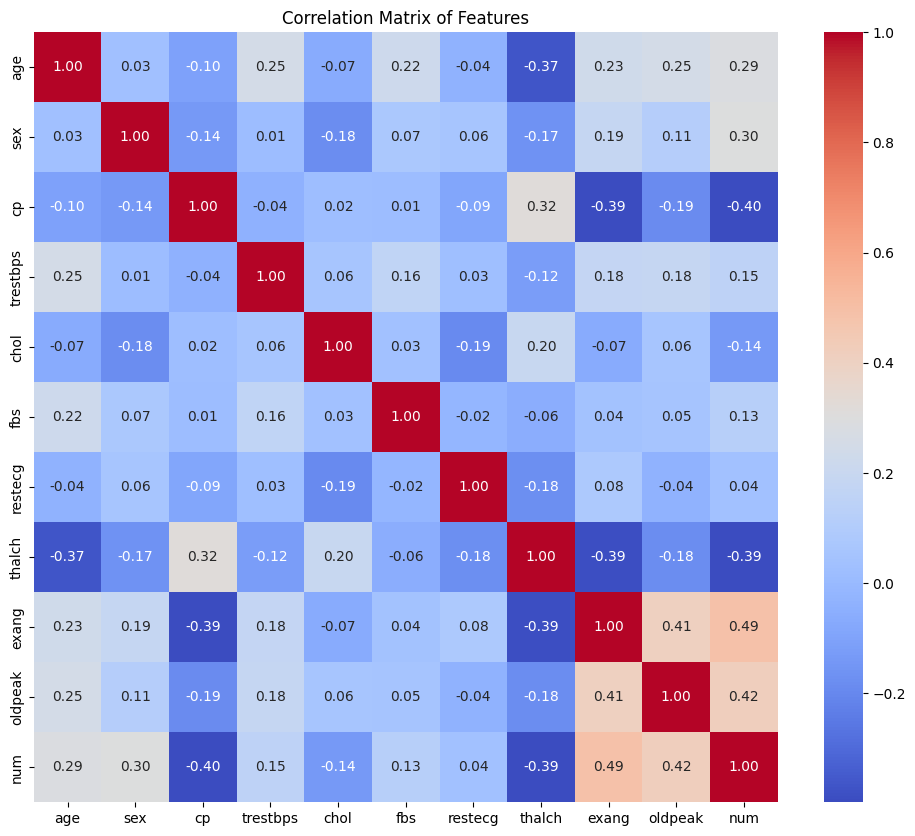

In [76]:
plt.figure(figsize=(12, 10))
correlation_matrix = heart_disease_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [77]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,53.097297,0.764865,0.787838,132.754054,220.136486,0.150000,0.925676,138.744595,0.400000,0.894324,0.517568
std,9.408127,0.424370,0.950529,18.581250,93.614555,0.357313,0.627421,25.846082,0.490229,1.087160,0.500029
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,197.000000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,231.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,159.250000,1.000000,1.500000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
from sklearn import metrics

def plot_confusion_matrix(actual, predicted):
    
    num_categories=len(set(actual))

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.arange(num_categories))
    
    cm_display.plot()
    plt.show()

CE loss: 0.40081806539219716
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        75
           1       0.82      0.86      0.84        73

    accuracy                           0.84       148
   macro avg       0.84      0.84      0.84       148
weighted avg       0.84      0.84      0.84       148



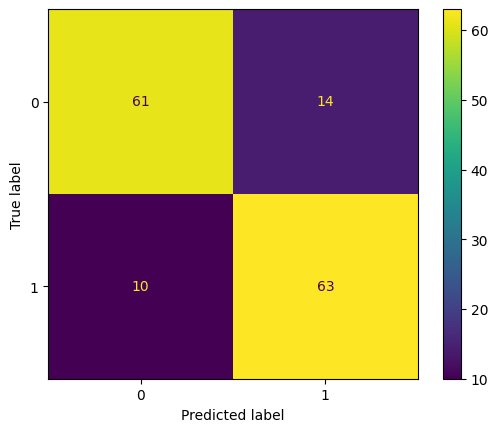

In [80]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)
standard_log_loss = log_loss(y_test, y_pred_proba)

print(f'CE loss: {standard_log_loss}')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

In [82]:
dim = X.shape[1]
n = X.shape[0]

# the following bounds are chosen independent to the data
x_bound = 1
y_bound = 1

In [88]:
def loss(theta):
    return np.sum(CE(X@theta,y))/n

def err(theta):
    return np.sum((X@theta > 0) != y) / n

def err_yhat(yhat):
    return np.sum((yhat != y)) / n

In [83]:
from autodp.autodp_core import Mechanism
from autodp.mechanism_zoo import GaussianMechanism
from autodp.transformer_zoo import ComposeGaussian


In [84]:
class NoisyGD_mech(Mechanism):
    def __init__(self,sigma,coeff,name='NoisyGD'):
        Mechanism.__init__(self)
        self.name = name
        self.params={'sigma':sigma,'coeff':coeff}
        
        # ----------- Implement noisy-GD here with "GaussianMechanism" and "ComposeGaussian" ----------------
        
        gm = GaussianMechanism(sigma,name='Release_gradient')
        # compose them with the transformation: ComposeGaussian.
        compose = ComposeGaussian() 
        mech = compose([gm], [coeff])
        
        # ------------- return a Mechanism object named 'mech' --------------------
        
        self.set_all_representation(mech)        

In [85]:
def gradient(theta):
    # -----------  Implement the gradient of f(theta) ----------- 
    grad = np.zeros(shape=(dim,))
    
    phat = np.exp(X@theta)/(1+np.exp(X@theta))
    grad = X[y==0,:].T@(phat[y==0]) -X[y==1,:].T@(1-phat[y==1].T)
    # ----------- Notice that f is the sum of the individual loss functions, NOT the averge. ----------- 
    return grad

In [86]:
def GS_bound(theta):
    # ----------- Calculate the global sensitivity, given theta -------------
    # Note that you may start with a constant upper bound then consider using a more adaptive bound
    
    GS = 100
    bound = np.linalg.norm(theta)
    GS = x_bound /(1+np.exp(-bound))
    
    GS_const = x_bound 
    
    # ------------------------
    return GS

In [87]:
def run_NoisyGD_step(theta,sigma, lr):
    GS = GS_bound(theta)
    return theta - lr * (gradient(theta)  + GS*sigma*np.random.normal(size=theta.shape))


In [ ]:
def run_NoisyGD(sigma,lr,niter, log_gap = 10):
    theta_GD = np.zeros(shape=(dim,))
    err_GD = []
    eps_GD = []
    for i in range(niter):
        theta_GD = run_NoisyGD_step(theta_GD,sigma, lr)
        if not i%log_gap:    
            mech = NoisyGD_mech(sigma,i+1)
            eps_GD.append(mech.approxDP(delta))
            err_GD.append(err(theta_GD))
    return err_GD, eps_GD


In [89]:
theta = np.zeros(shape=(dim,))
ss = gradient(theta)

InvalidIndexError: (id
1       True
2      False
3      False
4       True
5       True
       ...  
914    False
915    False
916    False
918    False
920    False
Name: num, Length: 740, dtype: bool, slice(None, None, None))

In [ ]:
# function to run NoisyGD 
def run_nonprivate_GD(lr,niter, log_gap = 10):
    theta_GD = np.zeros(shape=(dim,))
    err_GD = []
    for i in range(niter):
        theta_GD = run_NoisyGD_step(theta_GD,0, lr)
        if not i%log_gap:
            err_GD.append(err(theta_GD))
    return err_GD

In [91]:
import tensorflow as tf
import time
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer
from tensorflow_privacy.privacy.logistic_regression import multinomial_logistic
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


AttributeError: module 'tensorflow.python.util.tf_export' has no attribute 'ESTIMATOR_API_NAME'

In [92]:
# Hyperparameters
BATCH_SIZE = 256
EPOCHS = 10
LEARNING_RATE = 0.1
NOISE_MULTIPLIER = 1.0
L2_NORM_CLIP = 1.0
MICROBATCHES = 256
DPSGD = True
DELTA = 1e-5

In [ ]:



def train_dp_logistic_regression(epsilon, delta=1e-5, epochs=20, batch_size=32):
    # Create a DP optimizer
    optimizer = DPKerasSGDOptimizer(
        l2_norm_clip=1.0,  
        noise_multiplier=1.0 / epsilon,  
        num_microbatches=batch_size,
        learning_rate=0.001,
    )
    
    # Create a simple logistic regression model
    model = Sequential([
        Dense(1, activation='sigmoid', input_dim=X_train.shape[1])
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred_proba_dp = model.predict(X_test, batch_size=batch_size)
    dp_loss = log_loss(y_test, y_pred_proba_dp)
    return dp_loss

epsilons = [0.1, 0.5, 1.0, 2.0, 5.0]
dp_losses = [train_dp_logistic_regression(epsilon) for epsilon in epsilons]


plt.figure(figsize=(8, 6))
plt.plot(epsilons, dp_losses, marker='o', label='DP Logistic Regression')
plt.axhline(standard_log_loss, color='r', linestyle='--', label='Standard Logistic Regression')
plt.title('Cross-Entropy Loss vs Privacy Budget (ε)')
plt.xlabel('Privacy Budget (ε)')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.grid()
plt.show()
